# Outlier Treatement

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('placement.csv')
dataset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


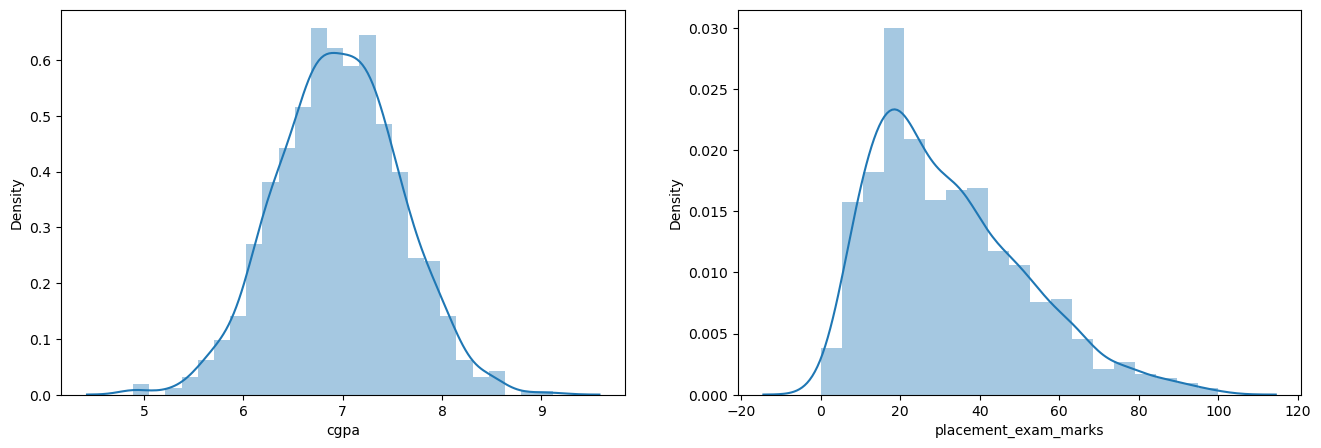

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['cgpa'])

plt.subplot(1,2,2)
sns.distplot(dataset['placement_exam_marks'])

plt.show()

In [ ]:
# cgpa - normal distibuted
# placement_exam_marks - right skewed distributed

# cgpa - normal distibuted

In [4]:
print("Mean value of cgpa :", dataset['cgpa'].mean())
print()
print("Std value of cgpa :", dataset['cgpa'].std())
print()
print("Min value of cgpa :", dataset['cgpa'].min())
print()
print("Max value of cgpa :", dataset['cgpa'].max())

Mean value of cgpa : 6.96124000000001

Std value of cgpa : 0.6158978751323894

Min value of cgpa : 4.89

Max value of cgpa : 9.12


In [5]:
# Finding the boundary values
print("Highest point", dataset['cgpa'].mean() + 3*dataset['cgpa'].std())

print()

print("Lowest point", dataset['cgpa'].mean() - 3*dataset['cgpa'].std())

Highest point 8.808933625397177

Lowest point 5.113546374602842


In [6]:
# Finding the outliers
# approach no - 1
dataset[(dataset['cgpa'] > 8.80) | (dataset['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [7]:
dataset.shape

(1000, 3)

# Trimming

In [9]:
new_df = dataset[(dataset['cgpa'] < 8.80) & (dataset['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [10]:
new_df[(new_df['cgpa'] > 8.80) | (new_df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed


In [11]:
# approach no - 2 (z_score)

dataset['cgpa_zscore'] = (dataset['cgpa'] - dataset['cgpa'].mean())/dataset['cgpa'].std()

In [12]:
dataset.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [13]:
dataset[dataset['cgpa_zscore'] > 3]  

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [14]:
dataset[dataset['cgpa_zscore'] < -3]  

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [17]:
dataset[(dataset['cgpa_zscore'] > 3)  | (dataset['cgpa_zscore'] < -3)]  

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
# Trimming


In [18]:
new_df = dataset[(dataset['cgpa_zscore'] < 3)  & (dataset['cgpa_zscore'] > -3)]  

In [19]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping - Transformation approach

In [20]:
upper_limit = dataset['cgpa'].mean() + 3 * dataset['cgpa'].std()
print(upper_limit)
print()
lower_limit = dataset['cgpa'].mean() - 3 * dataset['cgpa'].std()
print(lower_limit)

8.808933625397177

5.113546374602842


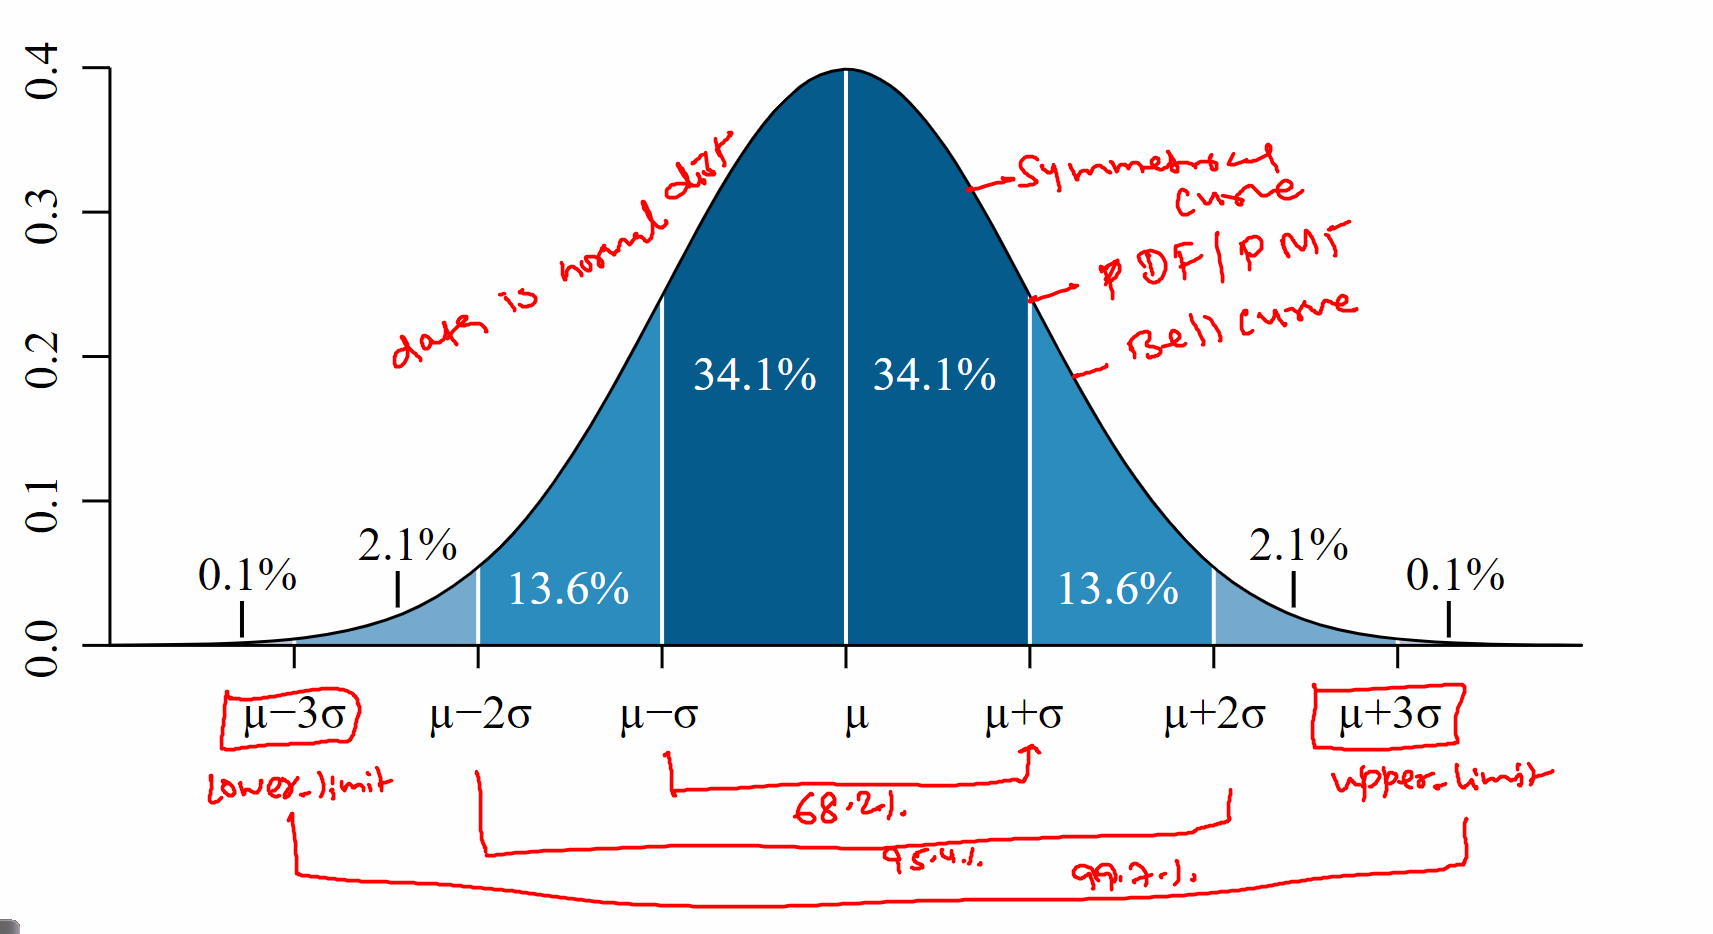

In [21]:
# capping method or transforming approach

dataset['cgpa'] = np.where(dataset['cgpa'] > upper_limit, upper_limit,
                          np.where(dataset['cgpa'] < lower_limit, lower_limit, dataset['cgpa']))

In [22]:
dataset.shape

(1000, 4)

In [23]:
dataset['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

# Data is skewed - method : IQR approach

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


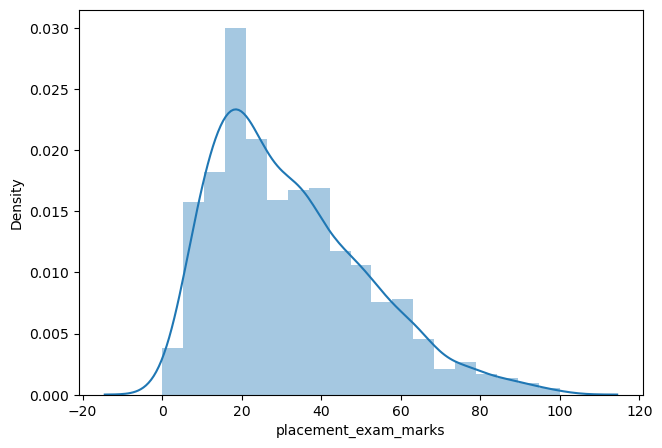

In [24]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.show()

In [25]:
dataset['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

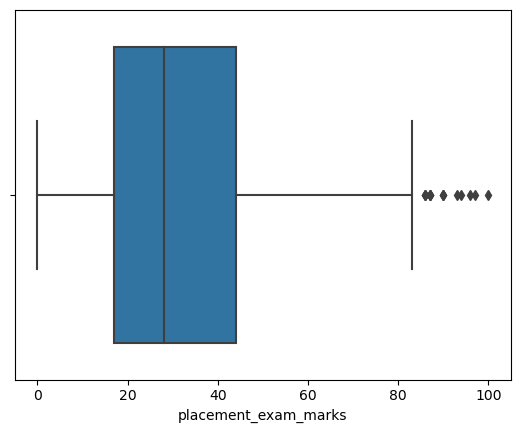

In [26]:
sns.boxplot(dataset['placement_exam_marks'])

In [27]:
# Finding the IQR = Q3 - Q1
# Q1 - 25th percentile
# Q3 - 75th percentile

percentile25 = dataset['placement_exam_marks'].quantile(0.25)
percentile75 = dataset['placement_exam_marks'].quantile(0.75)

print(percentile25)
print()
print(percentile75)

17.0

44.0


In [28]:
iqr = percentile75 - percentile25
iqr

27.0

In [29]:
upper_limit = percentile75 + 1.5 * iqr

lower_limit = percentile25 - 1.5 * iqr

print(upper_limit)
print()
print(lower_limit)

84.5

-23.5


In [30]:
# finding outlier in the dataset
dataset[dataset['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.280667
40,6.60,86.0,1,-0.586526
61,7.51,86.0,0,0.890992
134,6.33,93.0,0,-1.024910
162,7.80,90.0,0,1.361849
283,7.09,87.0,0,0.209061
290,8.38,87.0,0,2.303564
311,6.97,87.0,1,0.014223
324,6.64,90.0,0,-0.521580
630,6.56,96.0,1,-0.651472


In [32]:
dataset[dataset['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed,cgpa_zscore


# Trimming

In [33]:
new_df = dataset[dataset['placement_exam_marks'] < upper_limit]

In [34]:
new_df.shape

(985, 4)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

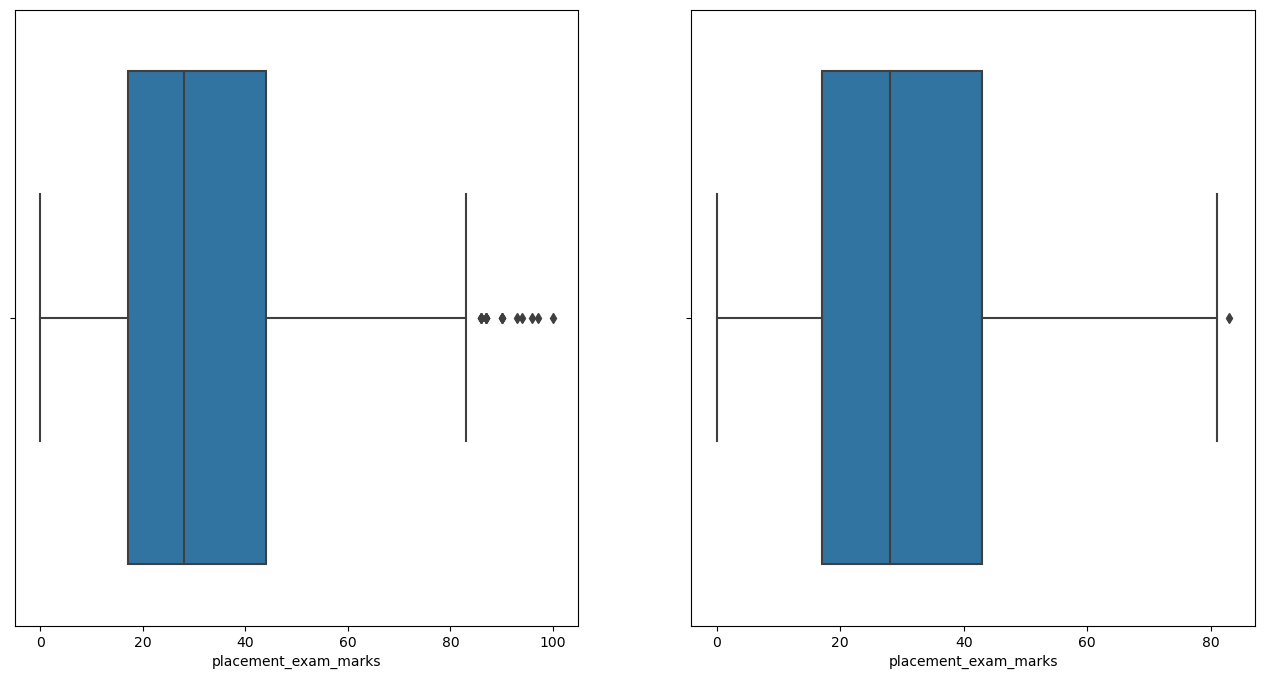

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(dataset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(new_df['placement_exam_marks'])

In [37]:
dataset.shape

(1000, 4)

# Capping

In [38]:
new_df_cap = dataset.copy()

In [39]:
new_df_cap.shape

(1000, 4)

In [40]:
new_df_cap.head(2)

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810


In [41]:
new_df_cap['placement_exam_marks'] = np.where(new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
                                             np.where(new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
                                                     new_df_cap['placement_exam_marks']))

In [42]:
new_df_cap.shape

(1000, 4)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

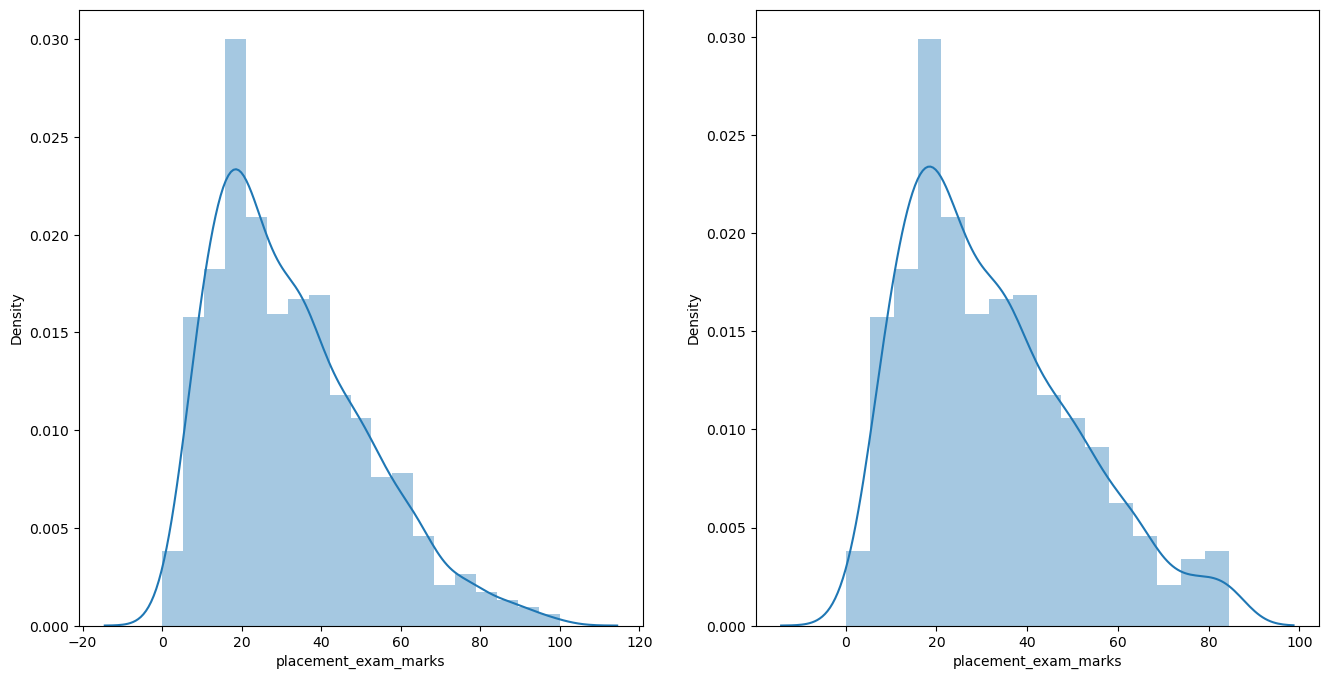

In [43]:
# Comparing 

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(dataset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.distplot(new_df_cap['placement_exam_marks'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='placement_exam_marks'>

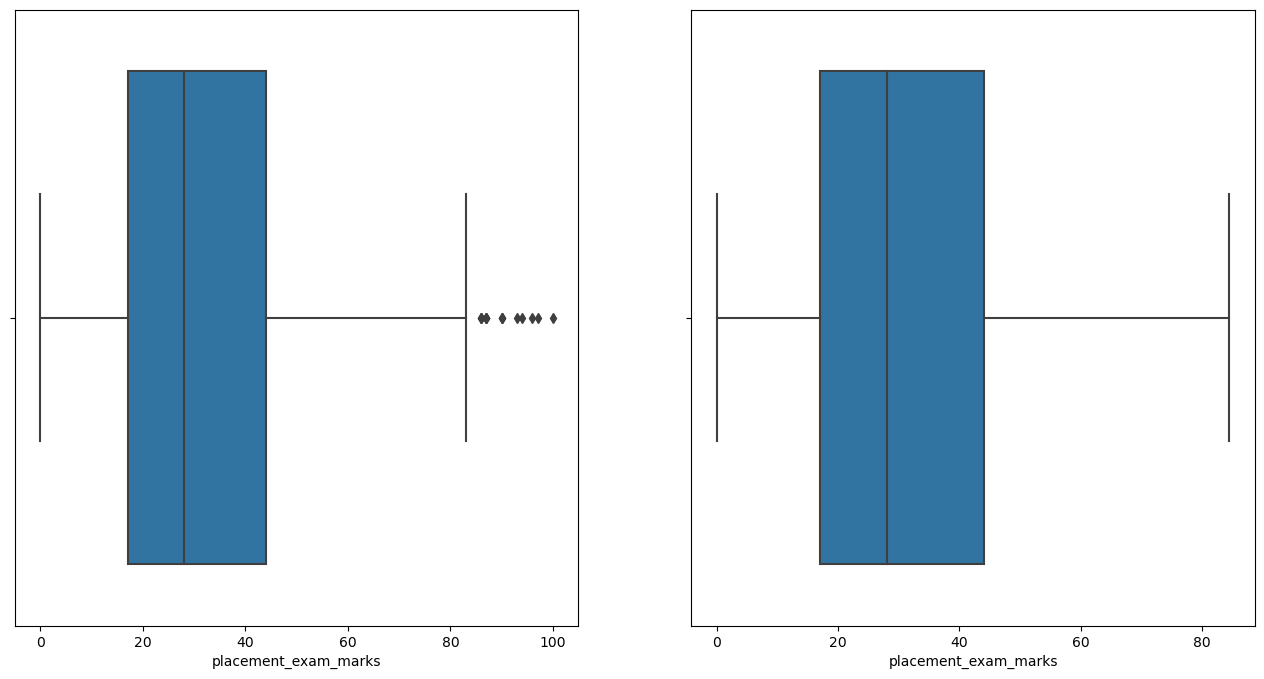

In [44]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.boxplot(dataset['placement_exam_marks'])

plt.subplot(1,2,2)
sns.boxplot(new_df_cap['placement_exam_marks'])

# How to handle imbalance dataset

In [47]:
dataset.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [48]:
dataset['placed'].value_counts()

0    511
1    489
Name: placed, dtype: int64

In [49]:
credit = pd.read_csv('creditcard.csv')
credit.shape

(284807, 31)

In [50]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [52]:
492/(492+284315)

0.001727485630620034

In [53]:
print(492+284315)
print(492+492)

284807
984


In [54]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# split the data into independent and dependent variable

In [55]:
x = credit.iloc[:,:-1]
y = credit.iloc[:,-1]

In [57]:
x.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [59]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# UnderSampling method - Target : Majority class

In [ ]:
# !pip install imblearn

In [60]:
import imblearn

In [63]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
x_under, y_under = under.fit_resample(x, y)

In [64]:
print(y.value_counts())
print()
print(y_under.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    492
1    492
Name: Class, dtype: int64


# NearMiss is an under sampling technique

In [69]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
x_nearmiss, y_nearmiss = nearmiss.fit_resample(x, y)

In [70]:
print(y.value_counts())
print()
print(y_nearmiss.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    492
1    492
Name: Class, dtype: int64


# OverSampling method - Target : Minority class

In [65]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
x_over, y_over = over.fit_resample(x,y)

In [66]:
print(y.value_counts())
print()
print(y_over.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    284315
1    284315
Name: Class, dtype: int64


# Synthetic Minority Oversampling Techniques (SMOTE)

In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

In [68]:
print(y.value_counts())
print()
print(y_smote.value_counts())

0    284315
1       492
Name: Class, dtype: int64

0    284315
1    284315
Name: Class, dtype: int64
